# Imports

In [720]:
import pandas as pd
import numpy as np
import missingno
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns
import scipy.stats as stats



# Question 1:

### Reading the dataset

In [721]:
df_raw = pd.read_csv('Volley_Ball_Score.csv')
df_raw

,Unnamed: 0,Player_Score_0,Player_Score_1,Player_Score_2,Player_Score_3,Player_Score_4,Player_Score_5,Player_Score_6,Score,Performance,Country,Players_Injured
0,0,-0.2924,-0.3871,0.8317,0.2060,NaN,0.2060,-0.2424,82.9055,below_average,France,1
1,1,0.1389,0.3659,0.5547,NaN,0.6240,NaN,1.1762,27.3858,below_average,Finland,2
2,2,0.9248,-2.3541,0.8332,-0.0715,0.1905,-0.0715,-0.7963,78.9628,neutral,Germany,0
3,3,-0.4830,0.2304,-1.0753,-0.0744,-1.1175,-0.0744,-3.0012,80.2715,below_average,Finland,0
4,4,-0.6334,1.3354,2.0009,-0.3142,-0.7913,-0.3142,-0.0846,102.4383,average,Norway,1
...,...,...,...,...,...,...,...,...,...,...,...,...
415,415,-2.4103,-0.2195,1.8519,NaN,0.9716,NaN,-0.2128,114.0887,below_average,Switzerland,1
416,416,0.1458,-0.0600,-0.1449,NaN,NaN,NaN,3.0714,21.9961,above_average,Finland,1
417,417,-0.4520,0.0608,-0.9824,0.9211,1.5176,0.9211,-0.1139,50.7298,neutral,Italy,0
418,418,0.3949,-0.0913,0.0339,NaN,0.7586,NaN,0.0767,11.3839,extraordinary,Germany,1


In [722]:
df_raw.shape

(420, 12)

### Checking and changing types

In [723]:
df_raw.dtypes

Unnamed: 0           int64
Player_Score_0     float64
Player_Score_1     float64
Player_Score_2     float64
Player_Score_3     float64
Player_Score_4     float64
Player_Score_5     float64
Player_Score_6     float64
Score              float64
Performance         object
Country             object
Players_Injured      int64
dtype: object

In [724]:
data_types_dict = {'Performance': 'category', 'Country': 'category'}
df_raw = df_raw.astype(data_types_dict)
df_raw.dtypes

Unnamed: 0            int64
Player_Score_0      float64
Player_Score_1      float64
Player_Score_2      float64
Player_Score_3      float64
Player_Score_4      float64
Player_Score_5      float64
Player_Score_6      float64
Score               float64
Performance        category
Country            category
Players_Injured       int64
dtype: object

There are 9 Numerical features and 2 Categorical features

In [725]:
df_raw

,Unnamed: 0,Player_Score_0,Player_Score_1,Player_Score_2,Player_Score_3,Player_Score_4,Player_Score_5,Player_Score_6,Score,Performance,Country,Players_Injured
0,0,-0.2924,-0.3871,0.8317,0.2060,NaN,0.2060,-0.2424,82.9055,below_average,France,1
1,1,0.1389,0.3659,0.5547,NaN,0.6240,NaN,1.1762,27.3858,below_average,Finland,2
2,2,0.9248,-2.3541,0.8332,-0.0715,0.1905,-0.0715,-0.7963,78.9628,neutral,Germany,0
3,3,-0.4830,0.2304,-1.0753,-0.0744,-1.1175,-0.0744,-3.0012,80.2715,below_average,Finland,0
4,4,-0.6334,1.3354,2.0009,-0.3142,-0.7913,-0.3142,-0.0846,102.4383,average,Norway,1
...,...,...,...,...,...,...,...,...,...,...,...,...
415,415,-2.4103,-0.2195,1.8519,NaN,0.9716,NaN,-0.2128,114.0887,below_average,Switzerland,1
416,416,0.1458,-0.0600,-0.1449,NaN,NaN,NaN,3.0714,21.9961,above_average,Finland,1
417,417,-0.4520,0.0608,-0.9824,0.9211,1.5176,0.9211,-0.1139,50.7298,neutral,Italy,0
418,418,0.3949,-0.0913,0.0339,NaN,0.7586,NaN,0.0767,11.3839,extraordinary,Germany,1


### Checking duplicates

In [726]:
df_raw.duplicated(keep=False).sum()

0

### Checking nulls

In [727]:
df_raw.isnull().mean()

Unnamed: 0         0.000000
Player_Score_0     0.000000
Player_Score_1     0.000000
Player_Score_2     0.000000
Player_Score_3     0.280952
Player_Score_4     0.185714
Player_Score_5     0.350000
Player_Score_6     0.000000
Score              0.000000
Performance        0.000000
Country            0.000000
Players_Injured    0.000000
dtype: float64

In [728]:
df_raw.isnull().sum().sum()


343

3 columns have have missing values but none of them have more than 70% of rows with missing data. I will handle the missing values instead of elimination. 

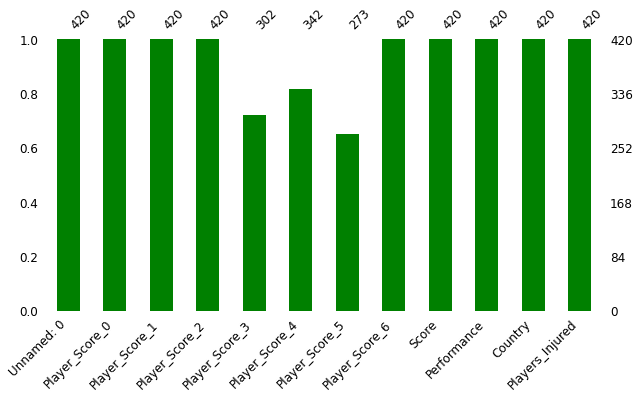

In [729]:
missingno.bar(df_raw.iloc[:,:],color="green", figsize=(10,5), fontsize=12);


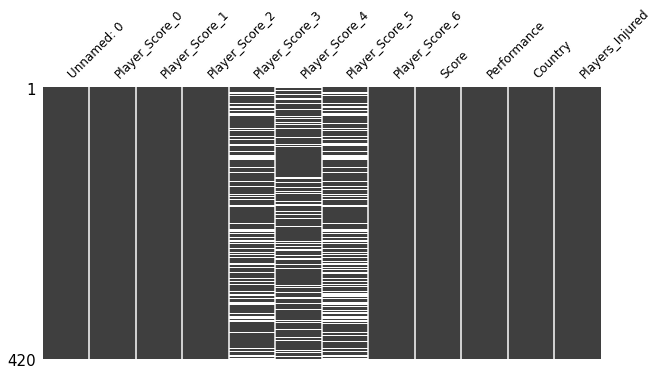

In [730]:
missingno.matrix(df_raw.iloc[:,:],figsize=(10,5), fontsize=12,sparkline=False);


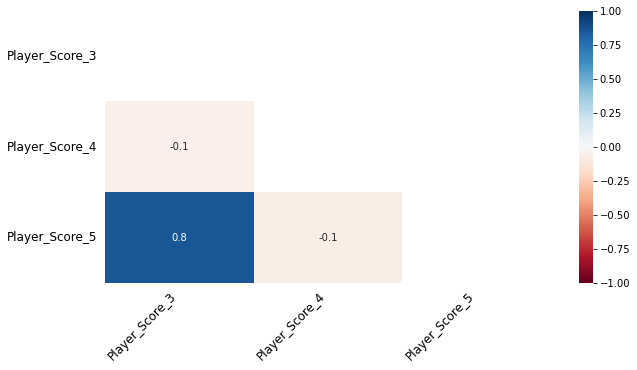

In [731]:
missingno.heatmap(df_raw.iloc[:,:8], figsize=(10,5), fontsize=12);

Making a deep copy of the dataset and using different duplicate filling methods.

## Missing values with kNN

In [732]:
df = df_raw.copy(deep=True)
df.drop(columns=['Country', 'Performance','Unnamed: 0'], inplace=True)


from sklearn.impute import KNNImputer
knn_imp = KNNImputer(n_neighbors=3)
# fit and transform the imputer on the dataset 
df_knn= pd.DataFrame(knn_imp.fit_transform(df), columns=df.columns)

In [733]:
df_knn.isnull().sum()

Player_Score_0     0
Player_Score_1     0
Player_Score_2     0
Player_Score_3     0
Player_Score_4     0
Player_Score_5     0
Player_Score_6     0
Score              0
Players_Injured    0
dtype: int64

### Plots of before and after

<AxesSubplot:ylabel='Density'>

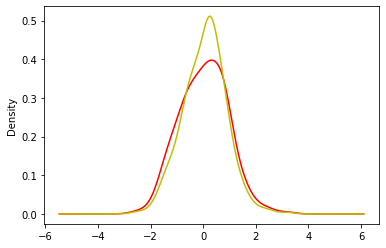

In [734]:
df['Player_Score_3'].plot.kde(color='r')
df_knn["Player_Score_3"].plot.kde(color='y')

<AxesSubplot:ylabel='Density'>

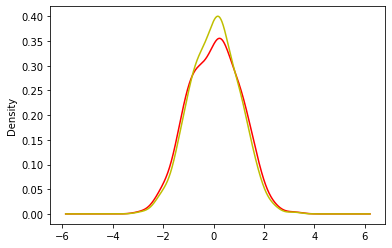

In [735]:
df['Player_Score_4'].plot.kde(color='r')
df_knn["Player_Score_4"].plot.kde(color='y')

<AxesSubplot:ylabel='Density'>

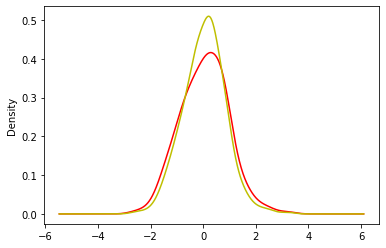

In [736]:
df['Player_Score_5'].plot.kde(color='r')
df_knn["Player_Score_5"].plot.kde(color='y')

0.0645205517780904

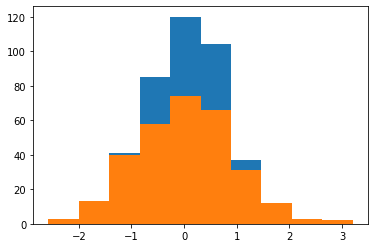

In [737]:
#calculating the jensenshannon distance between the probability distributions before and after imputation
from scipy.spatial import distance

counts_imputed,nins_imputed,values_imputed = plt.hist(df_knn["Player_Score_3"])
counts_imputed_probabilities = counts_imputed / counts_imputed.sum()

# probability distribution before imputation
counts,nins,values = plt.hist(df["Player_Score_3"])
counts_probabilities = counts / counts.sum()

# pdf distance calculation
distance.jensenshannon(counts_imputed_probabilities,counts_probabilities)


0.04416420089753926

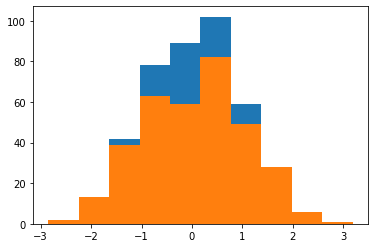

In [738]:
#calculating the jensenshannon distance between the probability distributions before and after imputation

counts_imputed,nins_imputed,values_imputed = plt.hist(df_knn["Player_Score_4"])
counts_imputed_probabilities = counts_imputed / counts_imputed.sum()

# probability distribution before imputation
counts,nins,values = plt.hist(df["Player_Score_4"])
counts_probabilities = counts / counts.sum()

# pdf distance calculation
distance.jensenshannon(counts_imputed_probabilities,counts_probabilities)


0.06357975816122968

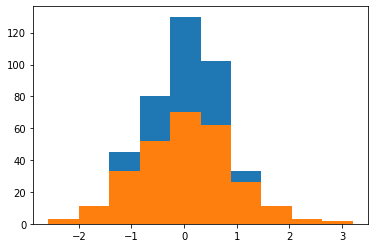

In [739]:
#calculating the jensenshannon distance between the probability distributions before and after imputation

counts_imputed,nins_imputed,values_imputed = plt.hist(df_knn["Player_Score_5"])
counts_imputed_probabilities = counts_imputed / counts_imputed.sum()

# probability distribution before imputation
counts,nins,values = plt.hist(df["Player_Score_5"])
counts_probabilities = counts / counts.sum()

# pdf distance calculation
distance.jensenshannon(counts_imputed_probabilities,counts_probabilities)


## Duplicates with Regression

In [740]:
#Choosing the columns without nan values to impute Player_Score_5.
df_regr5 = df_raw[['Player_Score_0', 'Player_Score_1','Player_Score_2','Player_Score_5','Player_Score_6']]


from sklearn.linear_model import LinearRegression
lr_model = LinearRegression()


train_data = df_regr5[df_regr5['Player_Score_5'].isnull()==False]
test_data = df_regr5[df_regr5['Player_Score_5'].isnull()==True]

ps_5_before_imp = train_data['Player_Score_5']

y = train_data['Player_Score_5'] #target is "Player_Score_5"
train_data.drop("Player_Score_5",axis=1,inplace=True) 
#features are all other features except "Player_Score_5"

lr_model.fit(train_data,y)

test_data.drop("Player_Score_5",axis=1,inplace=True)

# infer the missing values with the learned model
pred = lr_model.predict(test_data)
test_data['Player_Score_5']= pred

ps_5_lr = ps_5_before_imp.append(test_data['Player_Score_5'])

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_24332\1194549211.py:15: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_24332\1194549211.py:20: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_24332\1194549211.py:24: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Lenovo\AppData\Local\Temp\ip

In [741]:
#Choosing the columns without nan values to impute Player_Score_4.
df_regr4 = df_raw[['Player_Score_0','Player_Score_1','Player_Score_2','Player_Score_4','Player_Score_6']]


from sklearn.linear_model import LinearRegression
lr_model = LinearRegression()


train_data = df_regr4[df_regr4['Player_Score_4'].isnull()==False]
test_data = df_regr4[df_regr4['Player_Score_4'].isnull()==True]

ps_4_before_imp = train_data['Player_Score_4']

y = train_data['Player_Score_4'] #target is "Player_Score_4"
train_data.drop("Player_Score_4",axis=1,inplace=True) 
#features are all other features except "Player_Score_4"

lr_model.fit(train_data,y)

test_data.drop("Player_Score_4",axis=1,inplace=True)

# infer the missing values with the learned model
pred = lr_model.predict(test_data)
test_data['Player_Score_4']= pred

ps_4_lr = ps_4_before_imp.append(test_data['Player_Score_4'])


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_24332\604726220.py:15: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_24332\604726220.py:20: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_24332\604726220.py:24: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Lenovo\AppData\Local\Temp\ipyke

In [742]:
#Choosing the columns without nan values to impute Player_Score_3.
df_regr3 = df_raw[['Player_Score_0','Player_Score_1','Player_Score_2','Player_Score_3','Player_Score_6']]


from sklearn.linear_model import LinearRegression
lr_model = LinearRegression()


train_data = df_regr3[df_regr3['Player_Score_3'].isnull()==False]
test_data = df_regr3[df_regr3['Player_Score_3'].isnull()==True]

ps_3_before_imp = train_data['Player_Score_3']

y = train_data['Player_Score_3'] #target is "Player_Score_3"
train_data.drop("Player_Score_3",axis=1,inplace=True) 
#features are all other features except "Player_Score_3"

lr_model.fit(train_data,y)

test_data.drop("Player_Score_3",axis=1,inplace=True)

# infer the missing values with the learned model
pred = lr_model.predict(test_data)
test_data['Player_Score_3']= pred

ps_3_lr = ps_3_before_imp.append(test_data['Player_Score_3'])

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_24332\182232600.py:15: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_24332\182232600.py:20: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_24332\182232600.py:24: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Lenovo\AppData\Local\Temp\ipyke

<AxesSubplot:ylabel='Density'>

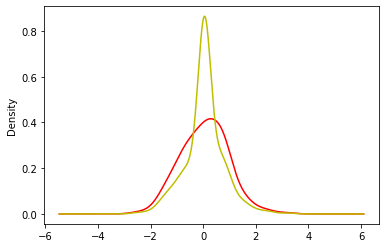

In [743]:
#visualising the distribution before and after imputation

#plotting the pdf after imputation
df_regr5['Player_Score_5'].plot.kde(color='r')

#plotting the pdf before imputation
ps_5_lr.plot.kde(color='y')

<AxesSubplot:ylabel='Density'>

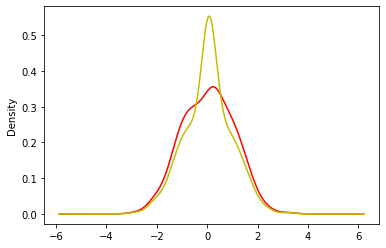

In [744]:
#visualising the distribution before and after imputation

#plotting the pdf after imputation
df_regr4['Player_Score_4'].plot.kde(color='r')

#plotting the pdf before imputation
ps_4_lr.plot.kde(color='y')

<AxesSubplot:ylabel='Density'>

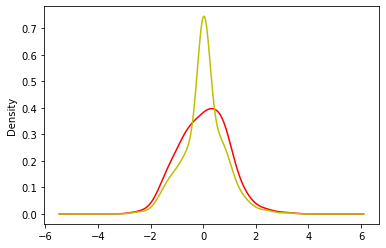

In [745]:
#visualising the distribution before and after imputation

#plotting the pdf after imputation
df_regr3['Player_Score_3'].plot.kde(color='r')

#plotting the pdf before imputation
ps_3_lr.plot.kde(color='y')

Checking both algorithms and choosing the best one

0.15804035497765384

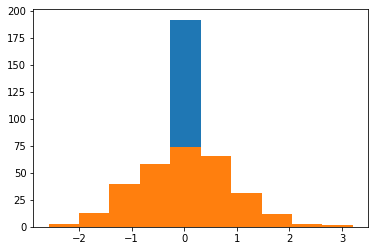

In [746]:
#calculating the jensenshannon distance between the probability distributions before and after imputation
#probability distribution after imputation
counts_imputed,nins_imputed,values_imputed = plt.hist(ps_3_lr)
counts_imputed_probabilities = counts_imputed / counts_imputed.sum()

# probability distribution before imputation
counts,nins,values = plt.hist(ps_3_before_imp)
counts_probabilities = counts / counts.sum()

# pdf distance calculation
distance.jensenshannon(counts_imputed_probabilities,counts_probabilities)

0.12638514073792098

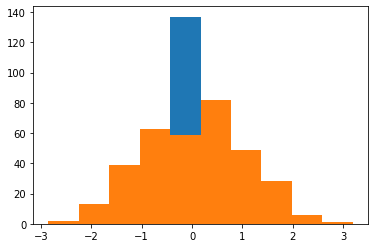

In [747]:
#calculating the jensenshannon distance between the probability distributions before and after imputation
#probability distribution after imputation
counts_imputed,nins_imputed,values_imputed = plt.hist(ps_4_lr)
counts_imputed_probabilities = counts_imputed / counts_imputed.sum()

# probability distribution before imputation
counts,nins,values = plt.hist(ps_4_before_imp)
counts_probabilities = counts / counts.sum()

# pdf distance calculation
distance.jensenshannon(counts_imputed_probabilities,counts_probabilities)

0.19037973174084133

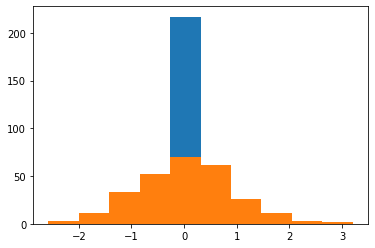

In [748]:
#calculating the jensenshannon distance between the probability distributions before and after imputation
#probability distribution after imputation
counts_imputed,nins_imputed,values_imputed = plt.hist(ps_5_lr)
counts_imputed_probabilities = counts_imputed / counts_imputed.sum()

# probability distribution before imputation
counts,nins,values = plt.hist(ps_5_before_imp)
counts_probabilities = counts / counts.sum()

# pdf distance calculation
distance.jensenshannon(counts_imputed_probabilities,counts_probabilities)

<AxesSubplot:ylabel='Density'>

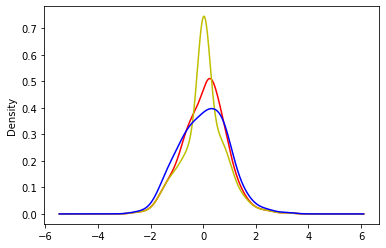

In [749]:
#plotting the pdf after imputation using knn
df_knn['Player_Score_3'].plot.kde(color='r')

#plotting the pdf before imputation using linear regression
ps_3_lr.plot.kde(color='y')

#plotting the pdf before imputation without imputation
ps_3_before_imp.plot.kde(color='b')

<AxesSubplot:ylabel='Density'>

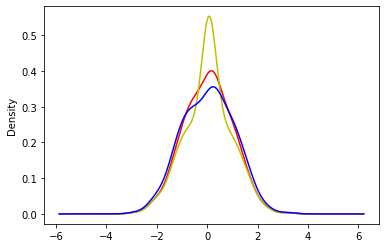

In [750]:
#plotting the pdf after imputation using knn
df_knn['Player_Score_4'].plot.kde(color='r')

#plotting the pdf before imputation using linear regression
ps_4_lr.plot.kde(color='y')

#plotting the pdf before imputation without imputation
ps_4_before_imp.plot.kde(color='b')

<AxesSubplot:ylabel='Density'>

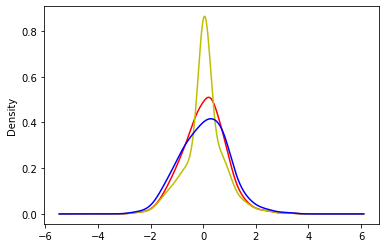

In [751]:
#plotting the pdf after imputation using knn
df_knn['Player_Score_5'].plot.kde(color='r')

#plotting the pdf before imputation using linear regression
ps_5_lr.plot.kde(color='y')

#plotting the pdf before imputation without imputation
ps_5_before_imp.plot.kde(color='b')

## 2. Linear Regression

### (a) Verify the features values distribution of the numerical variables

In [752]:
df_knn.describe()


,Player_Score_0,Player_Score_1,Player_Score_2,Player_Score_3,Player_Score_4,Player_Score_5,Player_Score_6,Score,Players_Injured
count,420.000000,420.000000,420.000000,420.000000,420.000000,420.000000,420.000000,420.000000,420.000000
mean,0.018029,-0.019279,-0.026326,0.056618,0.036992,0.043796,0.007360,99.437096,1.069048
std,0.991446,1.015430,0.998646,0.823813,0.953484,0.807093,0.964629,74.289233,1.025914
min,-3.318200,-3.713800,-2.763500,-2.576800,-2.848700,-2.576800,-3.001200,0.243600,0.000000
25%,-0.615950,-0.733750,-0.737325,-0.500150,-0.638017,-0.469875,-0.637350,44.284150,0.000000
50%,0.020900,-0.017650,-0.022650,0.142200,0.084317,0.119117,-0.020550,82.830650,1.000000
75%,0.726925,0.632525,0.666100,0.570325,0.690150,0.542500,0.629700,139.404300,2.000000
max,3.642700,2.907900,3.234600,3.205500,3.187300,3.205500,3.071400,367.257300,5.000000


array([[<AxesSubplot:title={'center':'Player_Score_0'}>,
        <AxesSubplot:title={'center':'Player_Score_1'}>,
        <AxesSubplot:title={'center':'Player_Score_2'}>],
       [<AxesSubplot:title={'center':'Player_Score_3'}>,
        <AxesSubplot:title={'center':'Player_Score_4'}>,
        <AxesSubplot:title={'center':'Player_Score_5'}>],
       [<AxesSubplot:title={'center':'Player_Score_6'}>,
        <AxesSubplot:title={'center':'Score'}>,
        <AxesSubplot:title={'center':'Players_Injured'}>]], dtype=object)

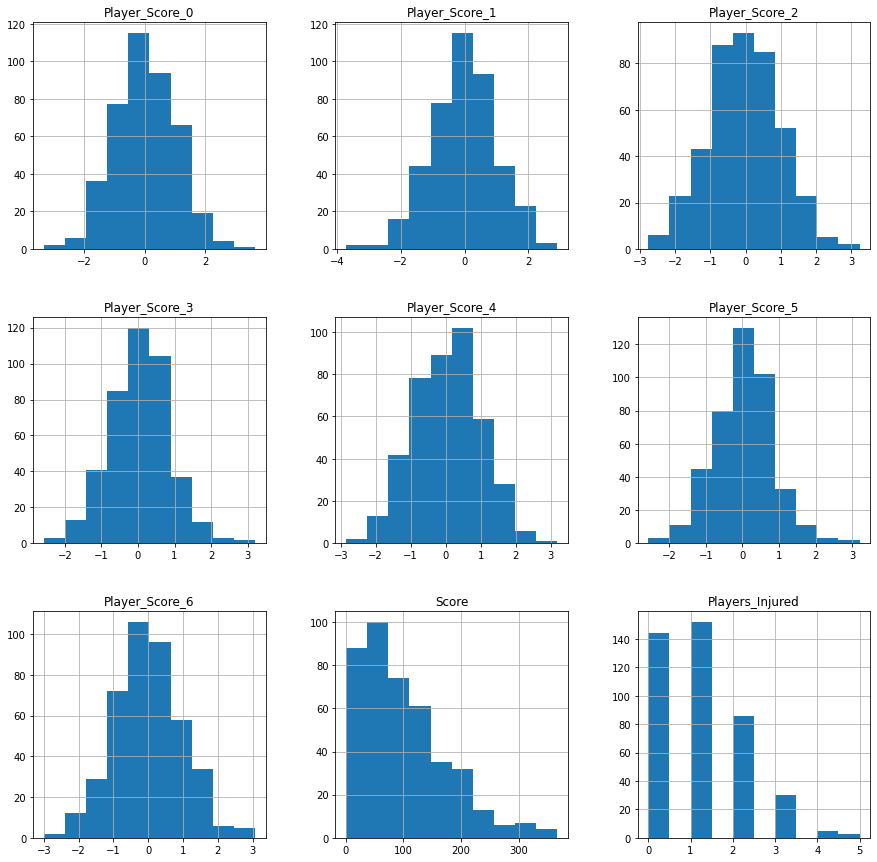

In [753]:
df_knn.iloc[:,:].hist(figsize=(15,15))

In [754]:
def hist_df(data, rows_max, cols_max):
     import plotly.graph_objects as go
     from plotly.subplots import make_subplots
     row = 1
     col = 1
     fig = make_subplots(rows=rows_max, cols=cols_max)
     for i in data.columns:
          if row == rows_max:
               fig.append_trace(go.Histogram(x=data[i], name=i), row=row, col=col)
               col+=1
               row = 1
               continue
          fig.append_trace(go.Histogram(x=data[i], name=i), row=row, col=col)
          row +=1  
          

     fig.show()
hist_df(df_knn, rows_max= 2,cols_max= 6)

### (b) Is features transformation necessary for the numerical variables? Let’s take into account that we are preparing the dataset for a Linear Regression task, with the goal of building a "Score" predictive model. If transformation is necessary, after justifying your choices, do proceed as described.

In [755]:
#Using minmax scaler from sklearn.preprocessing to scale the numerical columns in the dataframe. 
from sklearn.preprocessing import MinMaxScaler 

numerical_features=['Player_Score_0','Player_Score_1','Player_Score_2','Player_Score_3','Player_Score_4','Player_Score_5','Player_Score_6','Score']

from sklearn.preprocessing import RobustScaler

df_scaled = df_knn[numerical_features]
transformer = RobustScaler().fit(df_scaled)
transformer.transform(df_scaled)

array([[-2.33305408e-01, -2.70406763e-01,  6.08760710e-01, ...,
         8.58212948e-02, -1.75091749e-01,  7.86899516e-04],
       [ 8.78711719e-02,  2.80726794e-01,  4.11386430e-01, ...,
         4.23097502e-03,  9.44516791e-01, -5.82892794e-01],
       [ 6.73108070e-01, -1.71008765e+00,  6.09829524e-01, ...,
        -1.88286620e-01, -6.12248925e-01, -4.06627828e-02],
       ...,
       [-3.52154892e-01,  5.74188944e-02, -6.83862693e-01, ...,
         7.92180105e-01, -7.36750720e-02, -3.37476865e-01],
       [ 2.78506935e-01, -5.39056925e-02,  4.02942801e-02, ...,
        -4.47544964e-01,  7.67530879e-02, -7.51121082e-01],
       [ 1.29676999e+00,  6.52394284e-01, -6.12964711e-01, ...,
         5.24344569e-02,  2.96791760e-01, -6.70004726e-01]])

In [756]:
hist_df(df_scaled,2,6)

### (c) Verify the presence of outliers and eventually handle them. Justify your choices.

In [769]:
for i in df_scaled.columns:
    ##discovering outliers with IQR-score
    Q1 = df_scaled[i].quantile(0.05)
    Q3 = df_scaled[i].quantile(0.95)
    IQR = Q3 - Q1
    print(IQR)

    #DROP
    logical_index_not_outliers = (df_scaled[i] > (Q1 - 1.5 * IQR)) & (df_scaled[i] < (Q3 + 1.5 * IQR))
    df_scaled=df_scaled[logical_index_not_outliers]
    #CAP
    df_scaled.loc[(df_scaled[i] < Q1),i] = Q1
    df_scaled.loc[(df_scaled[i] > Q3),i] = Q3
df_scaled.shape

3.234561
3.3123915
3.29975375
2.6925899166666665
3.03921675
2.5925476666666665
3.2380182499999997
235.7037605


(420, 8)

There are no outliers to be handled since the robust scaling handled them, hence nothing was dropped

### (d) Is encoding necessary for the categorical variables? If yes, which kind of encoding? Specify your choices, justify them and perform categorical data encoding, if necessary.

In [799]:
#encode using sklearn
df_scaled['Country'] = df_raw['Country']
df_scaled['Performance'] = df_raw['Performance']


In [800]:
#Replace a categorical value with a specific numeric one
dictionary={"Performance": {'below_average':0, 'neutral':1, 'average':2, 'above_average':3, 'extraordinary':4}}
df_scaled.replace(dictionary, inplace=True)
display(df_scaled)


,Player_Score_0,Player_Score_1,Player_Score_2,Player_Score_3,Player_Score_4,Player_Score_5,Player_Score_6,Score,Country,Performance
0,-0.292400,-0.387100,0.831700,0.206000,0.914267,0.206000,-0.242400,82.9055,France,0
1,0.138900,0.365900,0.554700,0.123400,0.624000,0.123400,1.176200,27.3858,Finland,0
2,0.924800,-1.698928,0.833200,-0.071500,0.190500,-0.071500,-0.796300,78.9628,Germany,1
3,-0.483000,0.230400,-1.075300,-0.074400,-1.117500,-0.074400,-1.622103,80.2715,Finland,0
4,-0.633400,1.335400,1.615046,-0.314200,-0.791300,-0.314200,-0.084600,102.4383,Norway,2
...,...,...,...,...,...,...,...,...,...,...
415,-1.611139,-0.219500,1.615046,-0.138500,0.971600,-0.138500,-0.212800,114.0887,Switzerland,0
416,0.145800,-0.060000,-0.144900,-0.138433,-0.103067,-0.138433,1.615916,21.9961,Finland,3
417,-0.452000,0.060800,-0.982400,0.921100,1.517600,0.921100,-0.113900,50.7298,Italy,1
418,0.394900,-0.091300,0.033900,-0.333967,0.758600,-0.333967,0.076700,11.3839,Germany,4


### (e) Increase the dimensionality of the dataset introducing Polynomial Features – degree = 3 (continuous variables)

### (f) Eventually include any other transformation which might be necessary/appropriate and justify your choices.

## 3. Features Selection

### (a) Perform One Way ANOVA and test the relationship between variable Country and Score. Eventually, consider the possibility to remove the feature. Justify your choice.

### (b) Perform Features Selection and visualize the features which have been selected. Select one appropriate methodology for features selection and justify your choice.

## 4. Linear Regression

### (a) Train a Multiple Linear Regression model, using the Sklearn implementation of Linear Regression to find the best 𝜽 vector. Use all the transformed features, excluding the derived polynomial features. Evaluate the model with the learned 𝜽 on the test set.


### (b) Use all the transformed features, excluding the derived polynomial features, to identify the best values of 𝜽 by means of a Batch Gradient Descent procedure. Identify the best values of 𝜼 (starting with an initial value of 𝜼 = 0.1 ). Evaluate the model with the trained 𝜽 on the test set. Plot the train and the test error for increasing number of iterations of the Gradient Descent procedure (with the best value of 𝜼). Provide a comment of the plot.


### (c) Use the complete set of features, including the derived polynomial features. Train a Multiple Linear Regression model, using the Sklearn implementation of Linear Regression to find the best 𝜽 vector. Evaluate the model with the learned 𝜽 on the test set. Plot the train and the test error for increasing the size of the train-set (with the best value of 𝜼). Provide a comment of the plot.


### (d) Use the complete set of features, including the derived polynomial features. Train a Ridge Regression model identifying the best value of the learning rate 𝜶 that allows the model to achieve the best generalization performances. Evaluate the model.


### (e) Use the complete set of features, including the derived polynomial features. Train a Linear Regression model with Lasso regularization. Comment on the importance of each feature given the related trained parameter value of the trained model. Also, verify the number of features selected (related coefficient 𝜽 different from zero) with different values of 𝛼.


### (f) Use the subset of features selected in the Feature Selection task (question 3b). Train a Multiple Linear Regression model using the Sklearn implementation of Linear Regression to find the best 𝜽 vector. Evaluate the model.


### (g) Create a table with the evaluation results obtained from all the models above on both the train and test sets.

### (h) Compare and discuss the results obtained above.